# CS4035 - Cyber Data Analytics
## Lab 1 - Fraud data

### Submit on brightspace (zip file with the name Group_xx.zip)
(i) This jupyter file completed with code, plots, figures and report for each question. Additional plots and figures can be created for explanation before the end of each main question. Lab 1 contains 5 main questions, including the bonus. Write the code or explanation below each sub question. For the explanations, include what you would normally include in the report for this lab assignment, for example data pre-processing, hypothesis tested, approach, results, etc.
(ii) The libraries needed to run this file. Except for numpy, scikit-learn, pandas, matplotlib

Your peers should be able to use the readme section for instructions and be able to run this file. 

Make sure to keep your answers concise. Maximum number of words is 1000, which you can count with the code below. (You can add around 600 words since we start at around 400).

In [5]:
# If this cell does not work try running `pip install nbformat`

import io
import nbformat

nb = nbformat.read("Lab1-2021.ipynb", nbformat.NO_CONVERT)
word_count = 0
for cell in nb.cells:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').lstrip().split(' '))

print("Word count:", word_count)

Word count: 368


## Group Number :

## Student 1 
### Name :
### ID :

## Student 2
### Name :
### ID :

## Readme - Provide instructions - libraries used, location of the data file, etc. Keep it short. Remember your peers will not debug your code and should be able to reproduce the exact output you provide.

## Pre-processing

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import re
import csv

data = "train_data.csv"
df1 = pd.read_csv(data)

#Prepare card id and ip id for plotting

# 1.Card ID
card_enc = LabelEncoder()
card_enc.fit(df1['card_id'])
df1['card_id'] = card_enc.transform(df1.card_id)

# 2.IP ID
ip_enc = LabelEncoder()
ip_enc.fit(df1['ip_id'])
df1['ip_id'] = ip_enc.transform(df1.ip_id)

data = "train_data.csv"
df1 = pd.read_csv(data)

#Prepare card id and ip id for plotting

# 1.Card ID
card_enc = LabelEncoder()
card_enc.fit(df1['card_id'])
df1['card_id'] = card_enc.transform(df1.card_id)

# 2.IP ID
ip_enc = LabelEncoder()
ip_enc.fit(df1['ip_id'])
df1['ip_id'] = ip_enc.transform(df1.ip_id)

#Encoding, Cleaning the data
df1.loc[df1['cardverificationcodesupplied'].isna(),'cardverificationcodesupplied'] = False
df1.loc[df1['issuercountrycode'].isna(),'issuercountrycode'] = 'ZZ'
df1.loc[df1['shoppercountrycode'].isna(),'shoppercountrycode'] = 'ZZ'

unique_issuer_cc = df1['issuercountrycode'].unique()
unique_shopper_cc = df1['shoppercountrycode'].unique()
both = np.append(unique_issuer_cc, unique_shopper_cc)
df_countrycodes = pd.DataFrame(both)
unique_codes = df_countrycodes[0].unique()
enc = LabelEncoder()
enc.fit(unique_codes)
df1['issuercountrycode'] = enc.transform(df1.issuercountrycode)
df1['shoppercountrycode'] = enc.transform(df1.shoppercountrycode)
def conv(row):
    currency_dict = {"BGN": 1.9558, "NZD": 1.6805, "ILS": 4.0448, "RUB": 72.2099, "CAD": 1.5075, "USD": 1.1218,
                     "PHP": 58.125, "CHF": 1.1437, "ZAR": 16.0224, "AUD": 1.5911, "JPY": 124.93, "TRY": 6.6913,
                     "HKD": 8.8007, "MYR": 4.6314, "THB": 35.802, "HRK": 7.413, "NOK": 9.6678, "IDR": 15953.68,
                     "DKK": 7.4646, "CZK": 25.659, "HUF": 322.97, "GBP": 0.86248, "MXN": 21.2829, "KRW": 1308.01,
                     "ISK": 136.2, "SGD": 1.5263, "BRL": 4.405, "PLN": 4.2868, "INR": 78.0615, "RON": 4.7596,
                     "CNY": 7.5541, "SEK": 10.635}
    return row['amount'] / (currency_dict[row['currencycode']]*100)

df1['amount_eur'] = df1.apply(lambda x: conv(x), axis=1)


enc1 = LabelEncoder()
enc1.fit(df1['txvariantcode'])
df1['txvariantcode'] = enc1.transform(df1.txvariantcode)

enc2 = LabelEncoder()
enc2.fit(df1['currencycode'])
df1['currencycode'] = enc2.transform(df1.currencycode)

enc3 = LabelEncoder()
enc3.fit(df1['shopperinteraction'])
df1['shopperinteraction'] = enc3.transform(df1.shopperinteraction)

df1['accountcode'] = df1['accountcode'].apply(lambda x: re.sub('Account','',x))
df1['accountcode_cc'] = 0
df1.loc[(df1['accountcode'] == 'UK'),'accountcode_cc'] = 'GB'
df1.loc[(df1['accountcode'] == 'Mexico'),'accountcode_cc'] = 'MX'
df1.loc[(df1['accountcode'] == 'Sweden'),'accountcode_cc'] = 'SE'
df1.loc[(df1['accountcode'] == 'APAC'),'accountcode_cc'] = 'APAC'

enc4 = LabelEncoder()
enc4.fit(df1['accountcode'])
df1['accountcode'] = enc4.transform(df1.accountcode)

enc5 = LabelEncoder()
enc5.fit(df1['cardverificationcodesupplied'])
df1['cardverificationcodesupplied'] = enc5.transform(df1.cardverificationcodesupplied)

df1.loc[df1['mail_id'].str.contains('na',case=False),'mail_id'] = 'email99999'

enc6 = LabelEncoder()
enc6.fit(df1['mail_id'])
df1['mail_id'] = enc6.transform(df1.mail_id)

df1.loc[df1['cvcresponsecode'] > 2,'cvcresponsecode'] = 3

#Feature Engineering
df1['countries_equal'] = (df1['shoppercountrycode'] == df1['issuercountrycode'])
df1.loc[df1['countries_equal'] == False,'countries_equal'] = 0
df1.loc[df1['countries_equal'] == True,'countries_equal'] = 1


X = df1[['issuercountrycode','txvariantcode','bin','amount','currencycode','shoppercountrycode','shopperinteraction','cardverificationcodesupplied','cvcresponsecode','accountcode','mail_id','ip_id','card_id','amount_eur','countries_equal']]

## 1. Visualization task – 1 A4

### 1a. Plot visulations 

In [0]:
# Make lists of lists to group the normal transactions and the fraud transaction per CVC response code
cvc_response_codes = []
amounts_eur = []

cvc_response_codes_fraud = []
amounts_eur_fraud = []

for i in range(4):
    cvc_response_codes.append([])
    amounts_eur.append([])

    cvc_response_codes_fraud.append([])
    amounts_eur_fraud.append([])

#Add the values to the lists
for row in df1.values:
    cvc_code = row[9]
    amount_in_euros = row[15]
    # row[14] == 1 means a fraud transaction
    if row[14] == 1:
        #-0.2 so the barplots are next to each other
        cvc_response_codes_fraud[cvc_code].append(cvc_code - 0.2)
        amounts_eur_fraud[cvc_code].append(amount_in_euros)
    else:
        #+0.2 so the barplots are next to each other
        cvc_response_codes[cvc_code].append(cvc_code + 0.2)
        amounts_eur[cvc_code].append(amount_in_euros)

for i in range(len(cvc_response_codes)):
    cvc_response_codes[i] = np.mean(cvc_response_codes[i])
    amounts_eur[i] = np.mean(amounts_eur[i])

    if len(amounts_eur_fraud[i]) > 0:
        cvc_response_codes_fraud[i] = np.mean(cvc_response_codes_fraud[i])
        amounts_eur_fraud[i] = np.mean(amounts_eur_fraud[i])
    else:
        # If there are no fraud cases for a cvc code, the average is set to 0
        cvc_response_codes_fraud[i] = np.mean(cvc_response_codes[i])
        amounts_eur_fraud[i] = 0

plt.bar(cvc_response_codes, amounts_eur, color = 'b', width = 0.4, label = 'Normal')
plt.bar(cvc_response_codes_fraud, amounts_eur_fraud, color = 'g', width = 0.4, label = 'Fraud')

plt.xticks([0, 1, 2, 3], [0, 1, 2, 3])
# Add axis labels and a title
plt.xlabel('CVC Response Code')
plt.ylabel('Average Amount in Euros')
plt.title('CVC Response Code vs Average Amount in Euros')

# Add a legend
plt.legend()

In [0]:
benign_samples = df1[df1['label'] == 0]
fraudulent_samples = df1[df1['label'] == 1]

# Create a figure with a single subplot
fig, ax = plt.subplots(figsize=(8, 6))

# Combine the benign and fraudulent samples data into a single list
data = [benign_samples['amount_eur'], fraudulent_samples['amount_eur']]

# Plot side-by-side boxplots
ax.boxplot(data, labels=['Benign', 'Fraudulent'])

# Set labels and title
ax.set_xlabel('Label')
ax.set_ylabel('Amount (EUR)')
ax.set_title('Distribution of Transaction Amounts')

# Display the plot
plt.show()

# mean for amount_eur for fraud and non-fraud transactions
print(df1.groupby('label')['amount_eur'].mean())

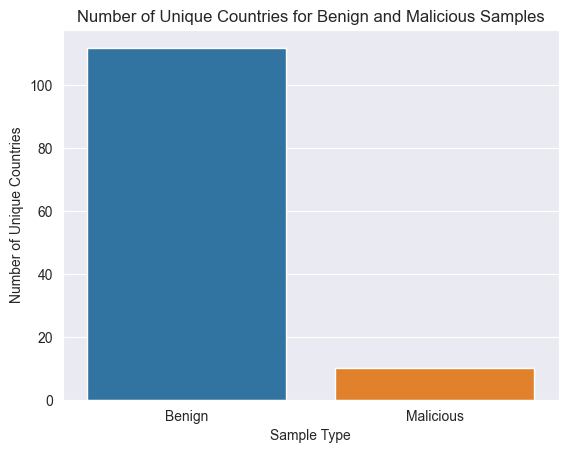

In [18]:
# Count the number of unique countries for benign and malicious samples
benign = df1[df1['label'] == 0]['issuercountrycode'].nunique()
malicious = df1[df1['label'] == 1]['issuercountrycode'].nunique()

# Create a bar plot
sns.barplot(x=['Benign', 'Malicious'], y=[benign, malicious])

# Add labels and title
plt.xlabel('Sample Type')
plt.ylabel('Number of Unique Countries')
plt.title('Number of Unique Countries for Benign and Malicious Samples')

# Display the plot
plt.show()

### 1b. Describe the visualizations and provide relavant explanations of features and relations.

## 2. Imbalance task – 1 A4 – Individual

### 2a. Print ROC curves

### 2b. Analyse the performance of the classifiers. Explain which method performs best.

### 2c. Is using SMOTE a good idea? Why (not)?

## 3. Privacy task – 1 A4 – Individual

### 3a. Print ROC curves

### 3b. Analyse the performance of the classifiers. Explain which method performs best.

### 3c. Can you explain the performance difference for the different classifiers? Is it advisable to protect people’s privacy using rank-swapping? Why (not)?

## 4. Classification task – 2 A4

### 4a. Print relevant plots and metrics with clear headings.

### 4b. Explain the applied data pre-processing steps, learning algorithms, and post-processing steps or ensemble methods. Compare the performance of the two algorithms, focusing on performance criteria that are relevant in practice, use 10-fold cross-validation.

## 5. Bonus task – 1 A4

### 5a. Provide code and report below